In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [9]:
root_file_dir= '~/Desktop/ROOT_files/'
file= uproot.open(root_file_dir + 'reco2-24c0e025-a2df-429a-b69a-dbf23351a356.root:Events')
file.keys(filter_name='*recob::Track*')


['anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2.',
 'anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2./anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2.present',
 'anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2./anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2.rangeSetID',
 'anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2./anab::Calorimetryrecob::Trackvoidart::Assns_pandoraSCECalo__Reco2.obj',
 'recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2.',
 'recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2./recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2.present',
 'recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2./recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2.rangeSetID',
 'recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2./recob::Hitrecob::Trackvoidart::Assns_pandoraSCEShower__Reco2.obj',
 'anab::ParticleIDrecob::

In [3]:
rr_name= 'anab::Calorimetrys_pandoraCalo__Reco2./anab::Calorimetrys_pandoraCalo__Reco2.obj/anab::Calorimetrys_pandoraCalo__Reco2.obj.fResidualRange'
dedx_name= 'anab::Calorimetrys_pandoraCalo__Reco2./anab::Calorimetrys_pandoraCalo__Reco2.obj/anab::Calorimetrys_pandoraCalo__Reco2.obj.fdEdx'
pos_name=  'anab::Calorimetrys_pandoraCalo__Reco2./anab::Calorimetrys_pandoraCalo__Reco2.obj/anab::Calorimetrys_pandoraCalo__Reco2.obj.fXYZ'

In [4]:
rr= file[str(rr_name)].array()
dedx= file[str(dedx_name)].array()
xyz= file[str(pos_name)].all_members
dedx=ak.flatten(ak.flatten(dedx)).to_numpy()
rr=ak.flatten(ak.flatten(rr)).to_numpy()

xyz

{'@fUniqueID': 0,
 '@fBits': 55705600,
 'fName': 'anab::Calorimetrys_pandoraCalo__Reco2.obj.fXYZ',
 'fTitle': 'fXYZ[anab::Calorimetrys_pandoraCalo__Reco2.obj_]',
 'fFillColor': 0,
 'fFillStyle': 1001,
 'fCompress': 1,
 'fBasketSize': 16384,
 'fEntryOffsetLen': 10,
 'fWriteBasket': 36,
 'fEntryNumber': 36,
 'fIOFeatures': <ROOT::TIOFeatures at 0x7f84367ea730>,
 'fOffset': 0,
 'fMaxBaskets': 37,
 'fSplitLevel': 0,
 'fEntries': 36,
 'fFirstEntry': 0,
 'fTotBytes': 7488606,
 'fZipBytes': 3972013,
 'fBranches': <TObjArray of 0 items at 0x7f84367ea760>,
 'fLeaves': <TObjArray of 1 items at 0x7f84367ea8e0>,
 'fBasketBytes': array([124218,  71318, 157582,  89521, 183662, 122219,  96259,  62846,
        126662,  64824,  62095,  46757,  96744, 121414,  76147, 119836,
        174896, 151136, 120144, 110672, 114687, 134058, 139545, 137337,
        137124,  84037,  87651,  96233,  77537, 186834, 138368, 156546,
         50093,  56977,  95762, 100272,      0], dtype=int32),
 'fBasketEntry': array([ 

In [5]:
remove= np.where((dedx>10)|(rr>25)|(dedx<0))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

(array([[nan, nan, nan, ...,  0.,  0.,  3.],
        [nan, nan, nan, ...,  1.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  1.],
        ...,
        [ 5.,  0.,  1., ...,  1.,  0.,  0.],
        [ 1.,  1.,  4., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]]),
 array([1.81606936e-03, 2.51796497e-01, 5.01776925e-01, 7.51757353e-01,
        1.00173778e+00, 1.25171821e+00, 1.50169864e+00, 1.75167906e+00,
        2.00165949e+00, 2.25163992e+00, 2.50162035e+00, 2.75160078e+00,
        3.00158120e+00, 3.25156163e+00, 3.50154206e+00, 3.75152249e+00,
        4.00150292e+00, 4.25148334e+00, 4.50146377e+00, 4.75144420e+00,
        5.00142463e+00, 5.25140505e+00, 5.50138548e+00, 5.75136591e+00,
        6.00134634e+00, 6.25132677e+00, 6.50130719e+00, 6.75128762e+00,
        7.00126805e+00, 7.25124848e+00, 7.50122891e+00, 7.75120933e+00,
        8.00118976e+00, 8.25117019e+00, 8.50115062e+00, 8.75113104e+00,
        9.00111147e+00, 9.25109190e+00, 9.50107233e+00, 9.75105276e

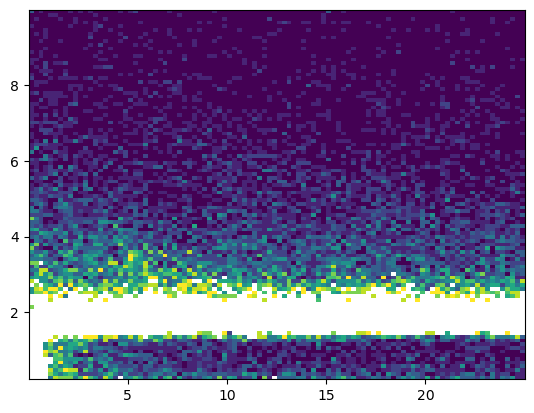

In [6]:
plt.hist2d(rr, dedx, bins=100, cmax=10)